In [1]:
#XGBOOST==>Extreme Gradient Boosting

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%load_ext rpy2.ipython

In [4]:
%cp gdrive/MyDrive/library.tar.gz .

In [5]:
!tar xf library.tar.gz


tar: Removing leading `/' from member names


In [6]:
%%R
.libPaths('usr/local/lib/R/site-library/')

In [7]:
%%R
install.packages("caTools")
install.packages("pROC")
library(pROC)

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caTools_1.18.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 64960 bytes (63 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

In [8]:
%%R
library(data.table) 
library(dplyr)      
library(ggplot2)  
library(caret)     
library(xgboost)    
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
library(glmnet)
library(groupdata2)
library(caTools)

R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:data.table’:

    between, first, last


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: lattice

R[write to console]: 
Attaching package: ‘xgboost’


R[write to console]: The following object is masked from ‘package:dplyr’:

    slice


R[write to console]: Loaded glmnet 4.1-3



In [9]:
%%R
data = read.csv('/content/gdrive/My Drive/DS_CP/diabetes.csv')

In [10]:
%%R
colnames(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


In [11]:
%%R
dim(data)

[1] 768   9


In [12]:
%%R
sapply(data, function(x) sum(is.na(x)))

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [13]:
%%R
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [14]:
%%R
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [15]:
%%R
set.seed(222) 
train_ind = sample.split(data, SplitRatio = 0.8)
train = data[train_ind,] #creates the training dataset with row numbers stored in train_ind
test= data[!train_ind,]
print("Dimensions of training set are:")
print(dim(train))
print("Dimensions of testing set are:")
dim(test)

[1] "Dimensions of training set are:"
[1] 597   9
[1] "Dimensions of testing set are:"
[1] 171   9


In [16]:
%%R
train<-upsample(
  train,
  cat_col= "Outcome",
  id_method = "n_ids",
)

In [17]:
%%R
table(as.factor(train$Outcome))


  0   1 
379 379 


In [18]:
%%R
x1<- train[-c(9)]
x2<- test[-c(9)]

In [19]:
%%R
x1<-data.matrix(x1, rownames.force = NA)

In [20]:
%%R
y_train<-train$Outcome

In [21]:
%%R
bst <- xgboost(data = x1, label = y_train,max_depth = 6, eta = 0.07, subsample = 0.8, nthread = -1,nrounds = 50,objective = "binary:logistic")

[02:10:09] WARNING: amalgamation/../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-logloss:0.659279 
[2]	train-logloss:0.629156 
[3]	train-logloss:0.602607 
[4]	train-logloss:0.577689 
[5]	train-logloss:0.555930 
[6]	train-logloss:0.535734 
[7]	train-logloss:0.517192 
[8]	train-logloss:0.498976 
[9]	train-logloss:0.484189 
[10]	train-logloss:0.469153 
[11]	train-logloss:0.456878 
[12]	train-logloss:0.443719 
[13]	train-logloss:0.433039 
[14]	train-logloss:0.423200 
[15]	train-logloss:0.412482 
[16]	train-logloss:0.402907 
[17]	train-logloss:0.392734 
[18]	train-logloss:0.383430 
[19]	train-logloss:0.374366 
[20]	train-logloss:0.367149 
[21]	train-logloss:0.358491 
[22]	train-logloss:0.350900 
[23]	train-logloss:0.343561 
[24]	train-logloss:0.336648 
[25]	train-logloss:0.330309 
[26]	train-logloss:

In [22]:
%%R
x2<-data.matrix(x2, rownames.force = NA)
y_test<-test$Outcome

In [23]:
%%R
pred <- predict(bst, x2)
# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != y_test)
print(paste("test-error=", err))
accuracy = 1-err
print(paste("Accuracy of XGBoost model is:",accuracy))

[1] "test-error= 0.175438596491228"
[1] "Accuracy of XGBoost model is: 0.824561403508772"


In [24]:
%%R
pred_new<-as.numeric(pred>0.5)
pred_new<-as.factor(pred_new)
pred_new

  [1] 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 [38] 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 [75] 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1
[149] 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0
Levels: 0 1


In [25]:
%%R
y_test<-as.factor(y_test)
cm<- confusionMatrix(pred_new,y_test)
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 102  11
         1  19  39
                                          
               Accuracy : 0.8246          
                 95% CI : (0.7591, 0.8784)
    No Information Rate : 0.7076          
    P-Value [Acc > NIR] : 0.0003063       
                                          
                  Kappa : 0.595           
                                          
 Mcnemar's Test P-Value : 0.2012426       
                                          
            Sensitivity : 0.8430          
            Specificity : 0.7800          
         Pos Pred Value : 0.9027          
         Neg Pred Value : 0.6724          
             Prevalence : 0.7076          
         Detection Rate : 0.5965          
   Detection Prevalence : 0.6608          
      Balanced Accuracy : 0.8115          
                                          
       'Positive' Class : 0               
                              

In [26]:
%%R
y_test<-as.numeric(y_test)
pred_new<-as.numeric(pred_new)
roc_xgb<- roc(y_test, pred_new)
roc_xgb

R[write to console]: Setting levels: control = 1, case = 2

R[write to console]: Setting direction: controls < cases




Call:
roc.default(response = y_test, predictor = pred_new)

Data: pred_new in 121 controls (y_test 1) < 50 cases (y_test 2).
Area under the curve: 0.8115


             [,1]
1 vs. 2 0.8114876


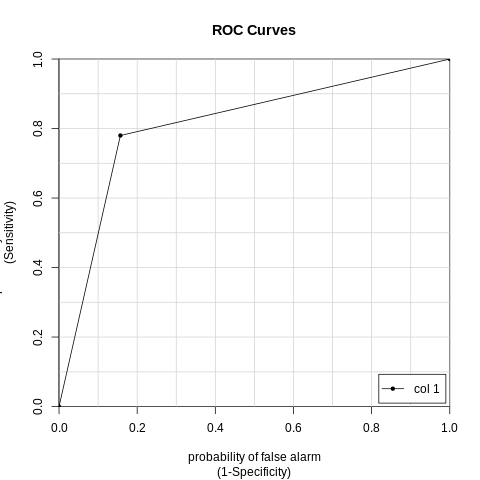

In [27]:
%%R
caTools::colAUC(pred_new, y_test, plotROC = T)

In [28]:
%%R
importanceRaw <- xgb.importance(feature_names = colnames(x1), model = bst, data = x1, label = y_train)
importanceClean <- importanceRaw[,`:=`(Cover=NULL, Frequency=NULL)]
importanceClean

                    Feature       Gain
1:                  Glucose 0.34081723
2:                      BMI 0.17987347
3:                      Age 0.13087373
4: DiabetesPedigreeFunction 0.12255579
5:            BloodPressure 0.07085053
6:            SkinThickness 0.05426450
7:                  Insulin 0.05265465
8:              Pregnancies 0.04811009


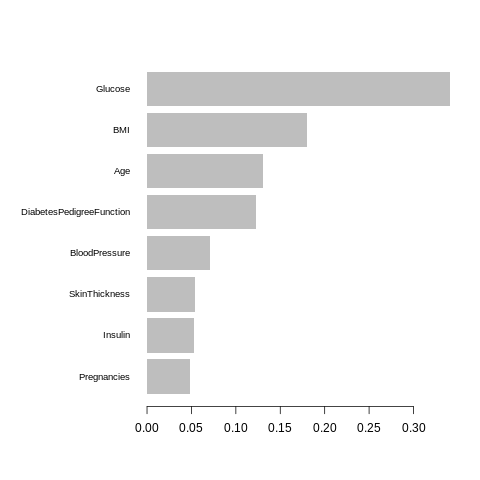

In [29]:
%%R
xgb.plot.importance(importance_matrix = importanceRaw)